# Traffic sign detection with SSD

In [2]:
import time
import numpy as np
import cv2
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt

import mxnet as mx
import mxnet.image as image
from mxnet import nd
from mxnet.gluon import nn
from mxnet import gluon
from mxnet.contrib.ndarray import MultiBoxTarget
from mxnet.contrib.ndarray import MultiBoxPrior

print("all module imported")

all module imported


# Load Data

### Load Image

In [14]:
BATCH_SIZE = 16
DATA_SHAPE = 512
train_iter = mx.image.ImageIter(  
   batch_size=BATCH_SIZE, label_width = 1,
   data_shape=(3, DATA_SHAPE, DATA_SHAPE),  
   path_imgrec='./dataset/dataset.rec',  
   path_imgidx='./dataset/dataset.idx',  #help shuffle performance
   shuffle=True)

batch = train_iter.next()

### Load Label

In [15]:
paths = glob.glob("dataset/scene-jpg/*.jpg")
labels = [[] for i in range(len(paths))]
gts = open("dataset/gt1.txt",'r').read().split('\n')[:-1]
for gt in gts:
    line = gt.split(";")
    idx = int(line[0].split(".")[0])
    minx = float(line[1])
    miny = float(line[2])
    maxx = float(line[3])
    maxy = float(line[4])
    label = int(line[5])
    labels[idx].append([minx, miny, maxx, maxy, label])
print(len(paths), len(gts), len(labels))
print(labels[0])

900 1213 900
[[0.5691, 0.5138, 0.5993, 0.5575, 11]]


In [28]:
%matplotlib inline
batch_label = batch.label[0].asnumpy().astype(int)
print(batch_label)
img = batch.data[0][0]
img = img.transpose((1, 2, 0))
img = img.clip(0,255).asnumpy()/255
mul_label = labels[batch_label[0]]
print(mul_label)

[723 284 364 117 769 219 526 469 205 825 685 741 558 310 647 313]
[[0.5485, 0.45, 0.5882, 0.51, 23], [0.1324, 0.4575, 0.1735, 0.5175, 23], [0.5118, 0.53, 0.5272, 0.5575, 4]]


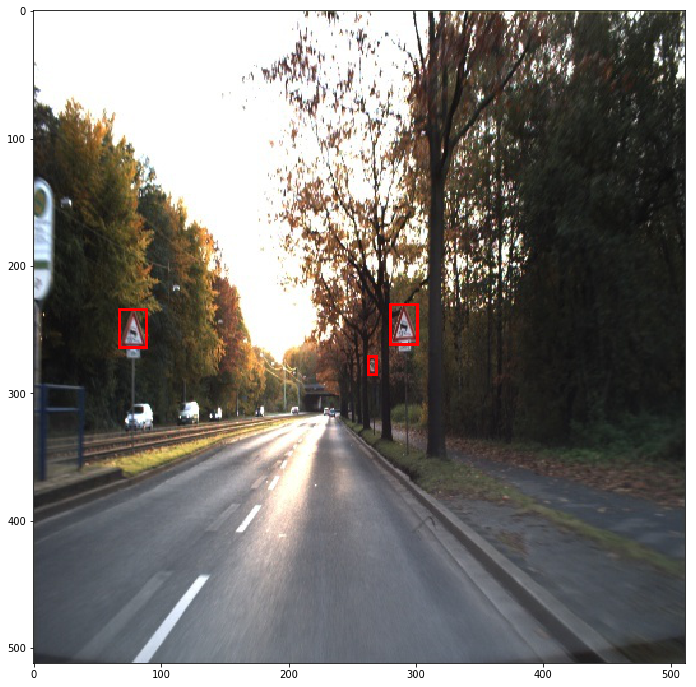

In [26]:
fig,ax = plt.subplots(1,  figsize=(12,12))
ax.imshow(img)
for box in mul_label:
    minx = int(box[0] * DATA_SHAPE)
    miny = int(box[1] * DATA_SHAPE)
    maxx = int(box[2] * DATA_SHAPE)
    maxy = int(box[3] * DATA_SHAPE)
    rect = plt.Rectangle((minx, miny), maxx-minx, maxy-miny,fill=False, edgecolor='red', linewidth=3)
    ax.add_patch(rect)
plt.show()